## Observations and Insights

## Dependencies and starter code

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
df_mouse =pd.merge(mouse_metadata , study_results, on="Mouse ID")


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_mouse_summarystats =df_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
df_mouse_summarystats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of data points')

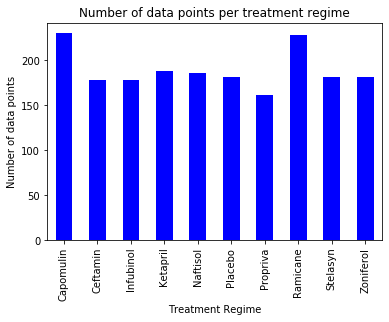

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_makers = df_mouse.groupby('Drug Regimen')['Drug Regimen'].count()


bar_chart = count_makers.plot(kind='bar',color="b", title = 'Number of data points per treatment regime')
bar_chart.set_xlabel('Treatment Regime')
bar_chart.set_ylabel('Number of data points')

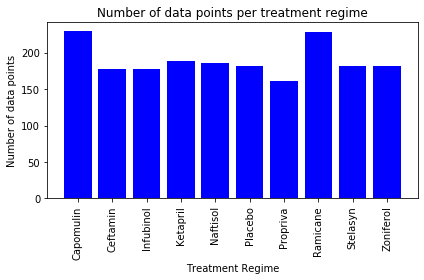

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Regimes = count_makers.index.to_numpy()
Counts = count_makers.to_numpy()
x_axis = np.arange(len(Regimes))
plt.bar(x_axis, Counts, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Regimes,rotation="vertical")


plt.title("Number of data points per treatment regime")
plt.xlabel("Treatment Regime")
plt.ylabel("Number of data points")
plt.tight_layout()

## Pie plots

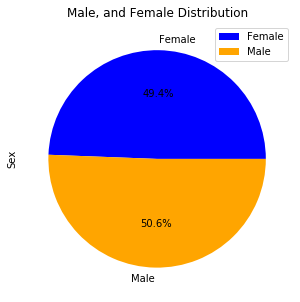

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_mouse_sexes=df_mouse.groupby('Sex')['Sex'].count()

df_mouses_sexes= pd.DataFrame(df_mouse_sexes)

colors = ["blue", "orange"]

sex_list= 'Sex' #I tried to make it with df_mouses_sexes.keys() but I got the following error : TypeError: Index.name must be a hashable type

sex_pie = df_mouses_sexes.plot(kind='pie',colors= colors ,y =sex_list,figsize=(5, 5), title='Male, and Female Distribution',autopct="%1.1f%%" ) 

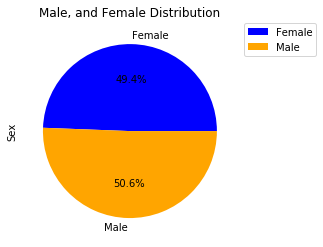

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex = df_mouse_sexes.index.to_numpy()

Counts_Sex = df_mouse_sexes.to_numpy()
colors = ["blue", "orange"]

plt.pie(Counts_Sex, labels=Sex, colors=colors, autopct="%1.1f%%")
plt.title('Male, and Female Distribution')
plt.ylabel('Sex')
plt.legend(Sex,
          loc="center left",
          bbox_to_anchor=(1, .42, 0, 1))

## Quartiles, outliers and boxplots

In [198]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
df_sorted =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_mouse_top4=df_mouse[df_mouse['Drug Regimen'].isin(df_sorted)]
df_mouse_top4 =pd.DataFrame(df_mouse_top4)

df_mouse_top4 #Capomulin, Ramicane, Infubinol, and Ceftamin.
df_mouse_top4=df_mouse_top4.reset_index()
df_mouse_top4= df_mouse_top4.drop(columns=['index'])
df_mouse_top4['ID'] = df_mouse_top4['Mouse ID']+ df_mouse_top4['Drug Regimen']
filter1 = df_mouse_top4.groupby('ID')['Timepoint'].max()
filter1 =pd.DataFrame(filter1)
filter1=filter1.reset_index()


df_mouse_top4 = pd.merge(filter1, df_mouse_top4, how='inner').set_index('Drug Regimen')
df_mouse_top4= df_mouse_top4.reset_index()
final_tumor_vol = df_mouse_top4[['Mouse ID', 'Drug Regimen','Timepoint','Tumor Volume (mm3)']]
final_tumor_vol #final tumor volume calculation


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [206]:
res = df_mouse_top4.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([0.25,0.75]).unstack(level = 1)
res['IQR'] = res[0.75]-res[0.25] 
res_IQR= res['IQR']
pd.DataFrame(res_IQR)#IQR calculation for each Drug Regimen

,IQR
Drug Regimen,
Capomulin,7.781863
Ceftamin,15.577752
Infubinol,11.477135
Ramicane,9.098537


In [243]:
res['Lower_Q-1.5IQR']= res[0.25]-1.5*res['IQR']
res['Higher_Q+1.5IQR']=res[0.75]+1.5*res['IQR']


df_mouse_outliars= df_mouse_top4.loc[((res.loc[df_mouse_top4['Drug Regimen'], 'Lower_Q-1.5IQR'] > df_mouse_top4["Tumor Volume (mm3)"].values) | (df_mouse_top4["Tumor Volume (mm3)"].values > res.loc[df_mouse_top4['Drug Regimen'],'Higher_Q+1.5IQR'])).values]
df_mouse_outliars
df_mouse_outliars =df_mouse_outliars.groupby(['Mouse ID','Drug Regimen'])['ID'].count()
df_mouse_outliars = pd.DataFrame(df_mouse_outliars)
df_mouse_outliars.rename(columns= {'ID': 'Potential Outliars'})

,,Potential Outliars
Mouse ID,Drug Regimen,
c326,Infubinol,1


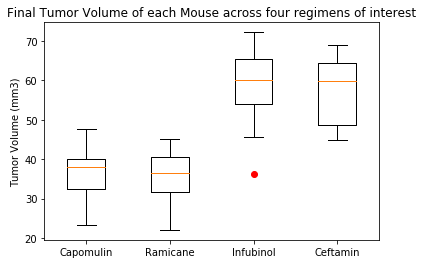

In [245]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df_mouse_top4_tumor = df_mouse_top4[['Tumor Volume (mm3)','Drug Regimen']]
df_mouse_top4_tumor
x1 = df_mouse_top4_tumor[df_mouse_top4_tumor['Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)']
x2 = df_mouse_top4_tumor[df_mouse_top4_tumor['Drug Regimen']== 'Ramicane']['Tumor Volume (mm3)']
x3 = df_mouse_top4_tumor[df_mouse_top4_tumor['Drug Regimen']== 'Infubinol']['Tumor Volume (mm3)']
x4 = df_mouse_top4_tumor[df_mouse_top4_tumor['Drug Regimen']== 'Ceftamin']['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each Mouse across four regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')

ax1.boxplot([x1, x2, x3,x4],sym = 'r')
x_axis = np.arange(0,len(df_sorted))
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, df_sorted, rotation="horizontal")
plt.show()

## Line and scatter plots

In [258]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_Capomulin =df_mouse[df_mouse['Drug Regimen'] == 'Capomulin']
df_Capomulin_rat = df_Capomulin[df_Capomulin['Mouse ID']== 's185']
df_Capomulin_rat= pd.DataFrame(df_Capomulin_rat)
df_Capomulin_rat=df_Capomulin_rat[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
10,s185,Capomulin,45.000000
11,s185,Capomulin,43.878496
12,s185,Capomulin,37.614948
13,s185,Capomulin,38.177232
14,s185,Capomulin,36.866876
15,s185,Capomulin,33.949940
16,s185,Capomulin,32.959671
17,s185,Capomulin,28.328531
18,s185,Capomulin,25.472143
19,s185,Capomulin,23.343598


In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen